In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import io
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
# # Import the dataset
# from google.colab import files
# uploaded = files.upload()

In [3]:
# # input some text
# texts = pd.read_csv(io.BytesIO(uploaded['comments.csv']))
# texts["comments"] = texts["comments"].str.replace(r"\\", "") ## Depending on your dataset, you may need to change here accordingly. 
# texts

In [4]:
### Input your dataset here if you choose to user your own dataset
texts = pd.read_csv('comments.csv')
texts

,comments
0,Great Professor with great chemistry knowledge...
1,This class was a lot of funny. Didn\'t want to...
2,By far the worst teacher I have ever had in my...
3,Very difficult to understand
4,This wasn\'t a bad class. He seems to know wha...
...,...
4785,Very nice guy cares about his students and tea...
4786,I took his class in Spring 2009. Excellent tea...
4787,I had Bill for his first year at Acadia - he w...
4788,Hellish course but with Dr. Ritchie it morphed...


In [5]:
#define a lemmatizer class
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    def __call__(self, doc):
      res = []
      for token in self.nlp(doc):
        if not token.is_punct and not token.like_num and len(token.lemma_) > 2: # not punctuation or numbers and length > 2
          res.append(token.lemma_) # lemmatize
      return res

In [6]:
# Test the lemmatizer on one sentence first
text = texts.loc[0,"comments"]
lt = LemmaTokenizer()
doc = lt(text)
doc

['Great',
 'Professor',
 'with',
 'great',
 'chemistry',
 'knowledge',
 'make',
 'student',
 'get',
 'involved',
 'and',
 'responsible',
 'his',
 'exam',
 'challenge',
 'but',
 'similar',
 'practice',
 'problem',
 'have',
 'idea',
 'how',
 'student',
 'grade',
 'poorly',
 'especially',
 'when',
 'she',
 'feel',
 'that',
 'she',
 "didn\\'t",
 'deserve',
 'pass',
 "I\\'m",
 'take',
 'now',
 'and',
 'his',
 'help',
 'greatly']

In [7]:
# Remove stopwords, and convert the texts into a word count matrix
ngram_range = (1,1) # unigram only
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",   # You can pass in your own stopword list
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df1

C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos",(hint,(some,-5pg,-especially,-not,-sr,-veronica,.lots,010b,...,zelazo,zheng,zipper,zirino,ziv,zombie,zone,zoology,zunz,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# get word frequency list
word_frequency = count_vect_df1.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,class,4219
1,good,1247
2,teacher,1181
3,easy,1152
4,professor,1151
...,...,...
6998,hayden,1
6999,hawkes,1
7000,hawke,1
7001,hawaiian,1


C:\Users\ftstc\AppData\Local\Temp\ipykernel_13056\1227273876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cate

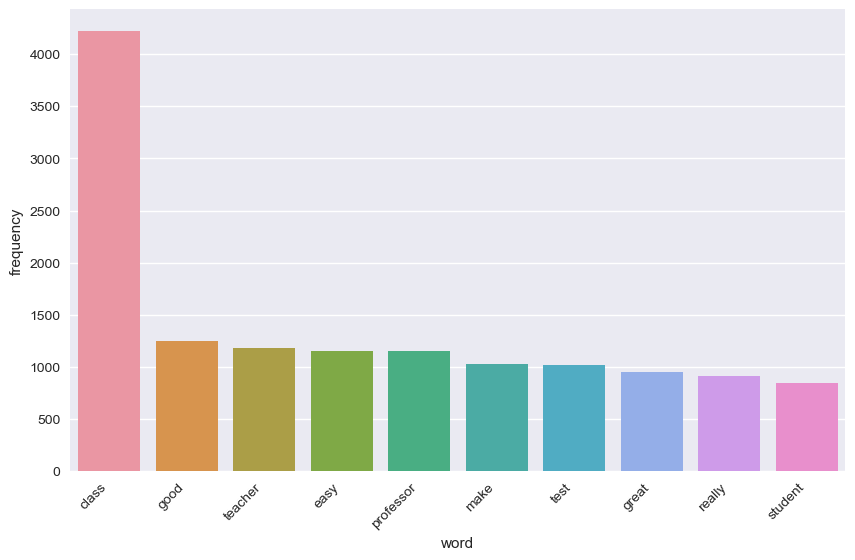

In [9]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(10)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

C:\Users\ftstc\AppData\Local\Temp\ipykernel_13056\584002869.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

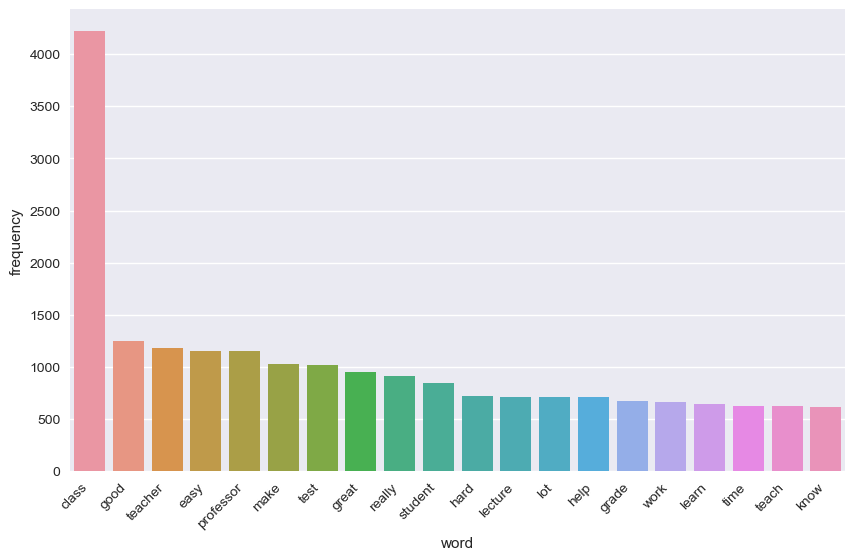

In [10]:
# Question 1: Please  create a bar chart to show the frequency for top 20 words. 
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(20)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

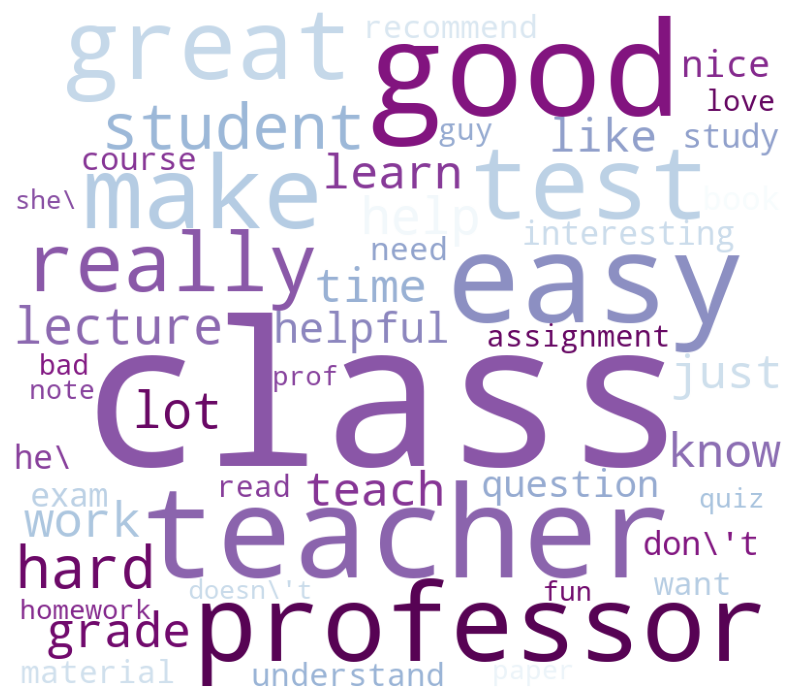

In [11]:
# plot the word cloud
freq = word_frequency.set_index("word").to_dict()['frequency'] # convert pandas dataframe to dictionary

fig, ax = plt.subplots(1, 1, figsize = (10,10))
wc = WordCloud(background_color="white",
                prefer_horizontal = 1,
                width=800,
                height=700,
                max_words=50,
                relative_scaling=0.5,
                #font_path = "arial.ttf", # pass your own font path
                colormap = "BuPu", #matplotlib colormap
                random_state= 2022)
wc.generate_from_frequencies(freq)
ax.imshow(wc)
ax.axis("off")
plt.show()

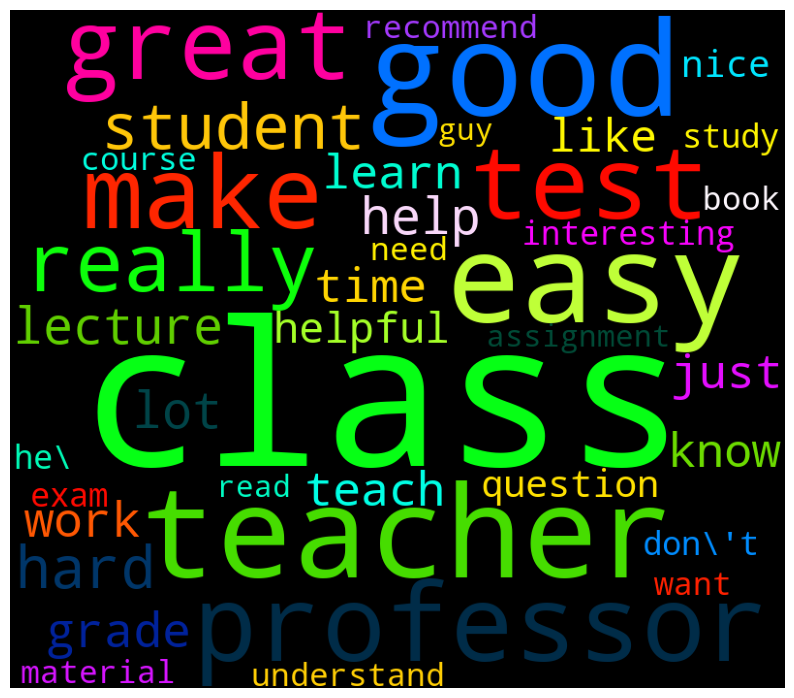

In [12]:
# Question 2: Please create a word cloud out of the text data. 
# Change the background and text color to colors of your choice. Limit the number of words to be no more than 40.
fig, ax = plt.subplots(1, 1, figsize = (10,10))
wc = WordCloud(background_color="black",
                prefer_horizontal = 1,
                width=800,
                height=700,
                max_words=40,
                relative_scaling=0.5,
                #font_path = "arial.ttf", # pass your own font path
                colormap = "gist_ncar_r", #matplotlib colormap
                random_state= 2022)
wc.generate_from_frequencies(freq)
ax.imshow(wc)
ax.axis("off")
plt.show()

In [13]:
# This calcualtes bigram matrix
ngram_range = (2,2)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df2

C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos help",(hint hint,(some say,-5pg long,-especially book,-not fault,-not update,.lots work,010b spring,10+pg research,...,zheng tell,zipper backpack,zirino great,ziv amazing,ziv really,zombie apocalypse,zone meet,zoology seminar,zunz really,zzzzzzzzz it\
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# get the phrase frequency list
word_frequency = count_vect_df2.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,great teacher,227
1,good teacher,217
2,good professor,177
3,make sure,169
4,easy class,149
...,...,...
45944,half devote,1
45945,half drop,1
45946,half grade,1
45947,half ill,1


C:\Users\ftstc\AppData\Local\Temp\ipykernel_13056\822460159.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

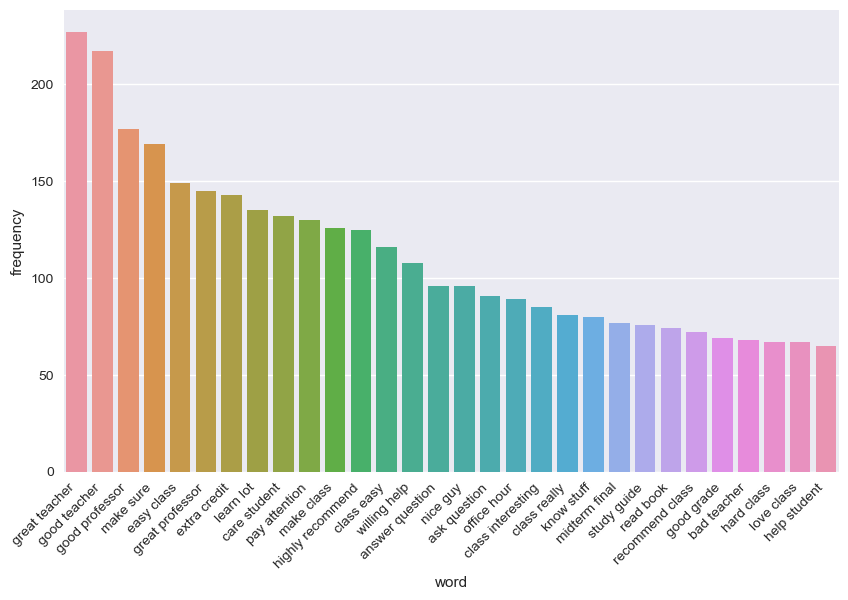

In [15]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(30)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

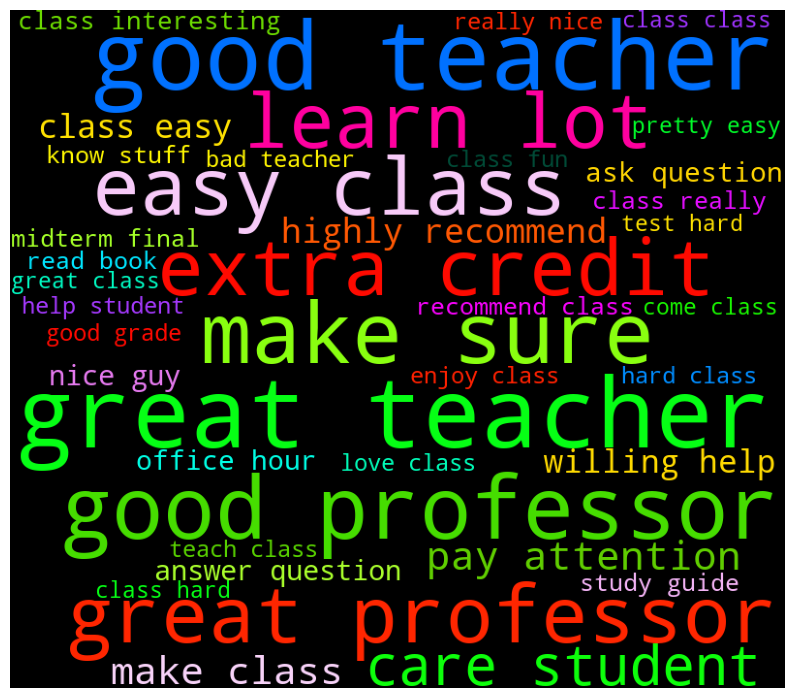

In [16]:
# Question 3: Please create a word cloud based on the bi-gram, i.e., 2-word phrase cloud
freq = word_frequency.set_index("word").to_dict()['frequency'] # convert pandas dataframe to dictionary
fig, ax = plt.subplots(1, 1, figsize = (10,10))
wc = WordCloud(background_color="black",
                prefer_horizontal = 1,
                width=800,
                height=700,
                max_words=40,
                relative_scaling=0.5,
                #font_path = "arial.ttf", # pass your own font path
                colormap = "gist_ncar_r", #matplotlib colormap
                random_state= 2022)
wc.generate_from_frequencies(freq)
ax.imshow(wc)
ax.axis("off")
plt.show()

In [17]:
# This creates the trigram matrix
ngram_range = (3,3)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df3 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df3

C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos help explain",(hint hint type,(some say tricky,-5pg long 30pg,-especially book report-,-not update limited,.lots work stick,010b spring semester,10+pg research paper,100%s test time,...,zheng tell lot,zipper backpack miss,zirino great guy,ziv amazing personality,ziv really convey,zombie apocalypse class,zone meet new,zoology seminar week,zunz really enthusiastic,zzzzzzzzz it\ year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# get the phrase frequency list
word_frequency = count_vect_df3.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,really care student,35
1,make class interesting,30
2,make sure understand,30
3,pay attention class,24
4,highly recommend class,24
...,...,...
67146,good teach quite,1
67147,good teach require,1
67148,good teacher actual,1
67149,good teacher answer,1


C:\Users\ftstc\AppData\Local\Temp\ipykernel_13056\822460159.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

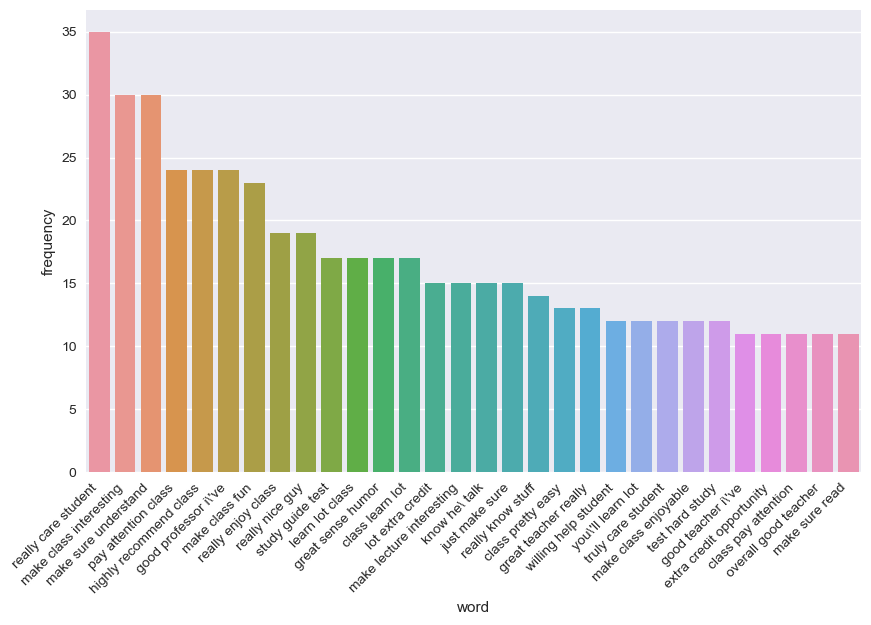

In [19]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(30)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()